<a href="https://colab.research.google.com/github/shubhamjaiswal06/Moon-hop-experiment/blob/main/Chandrayaan3_CameraTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Load the two images
image1 = cv2.imread('/content/drive/MyDrive/Chandrayaan3/After.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/drive/MyDrive/Chandrayaan3/Before.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
image1 = image1[0:593, 0:786]

In [ ]:
image2 = image2[0:593, 0:786]

In [ ]:
print(image1.shape)
print(image2.shape)

(593, 786)
(593, 786)


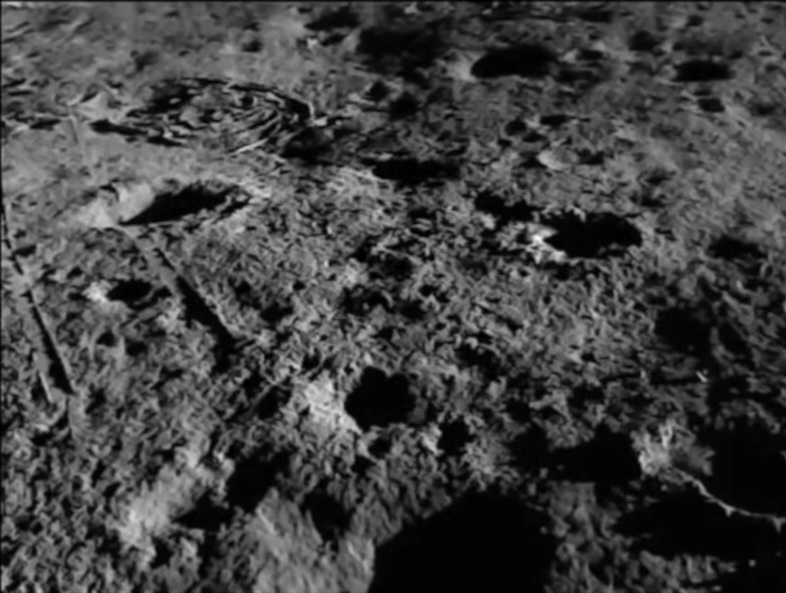

In [ ]:
cv2_imshow(image1)

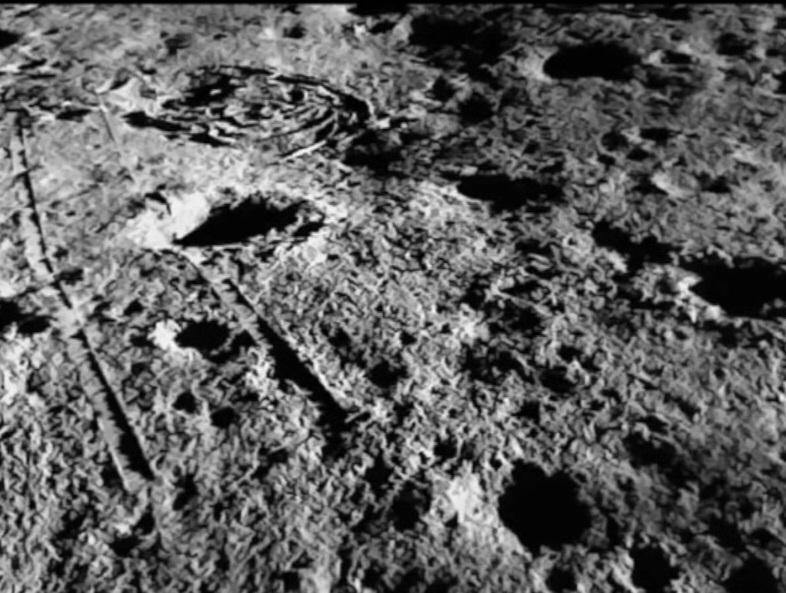

In [ ]:
cv2_imshow(image2)

In [ ]:
# Perform feature detection and matching (using goodFeaturesToTrack and calcOpticalFlowPyrLK)
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

In [ ]:
# Find features in the first image
p0 = cv2.goodFeaturesToTrack(image1, mask=None, **feature_params)

In [ ]:
# Calculate optical flow from image1 to image2
p1, st, err = cv2.calcOpticalFlowPyrLK(image1, image2, p0, None, **lk_params)

Translation Vector: [3.9593563 3.815169 ]


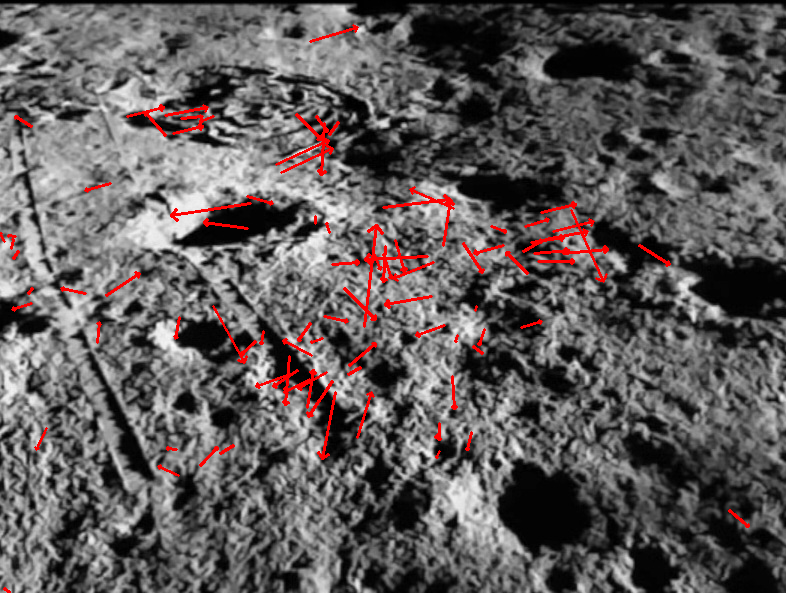

In [ ]:
# Calculate optical flow from image1 to image2
if p0 is not None:  # Check if features were found
    p1, st, err = cv2.calcOpticalFlowPyrLK(image1, image2, p0, None, **lk_params)

    # Filter out the valid points
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Create an image to draw motion vectors on (a copy of image2)
    image_with_motion = image2.copy()

    arrow_color = (0, 0, 255)

    # Draw arrows for motion vectors on the image
    for (new, old) in zip(good_new, good_old):
        a, b = new.ravel().astype(int)
        c, d = old.ravel().astype(int)
        cv2.arrowedLine(image_with_motion, (c, d), (a, b), arrow_color, 2)  # Red arrows

    # Calculate the overall translation (mean of motion vectors)
    mean_motion_vector = np.mean(good_new - good_old, axis=0)

    # Display the translation vector
    print("Translation Vector:", mean_motion_vector)

    # Show the image with motion arrows
    cv2_imshow(image_with_motion)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    print("No features found in the first image.")

In [ ]:
#NEW CODE

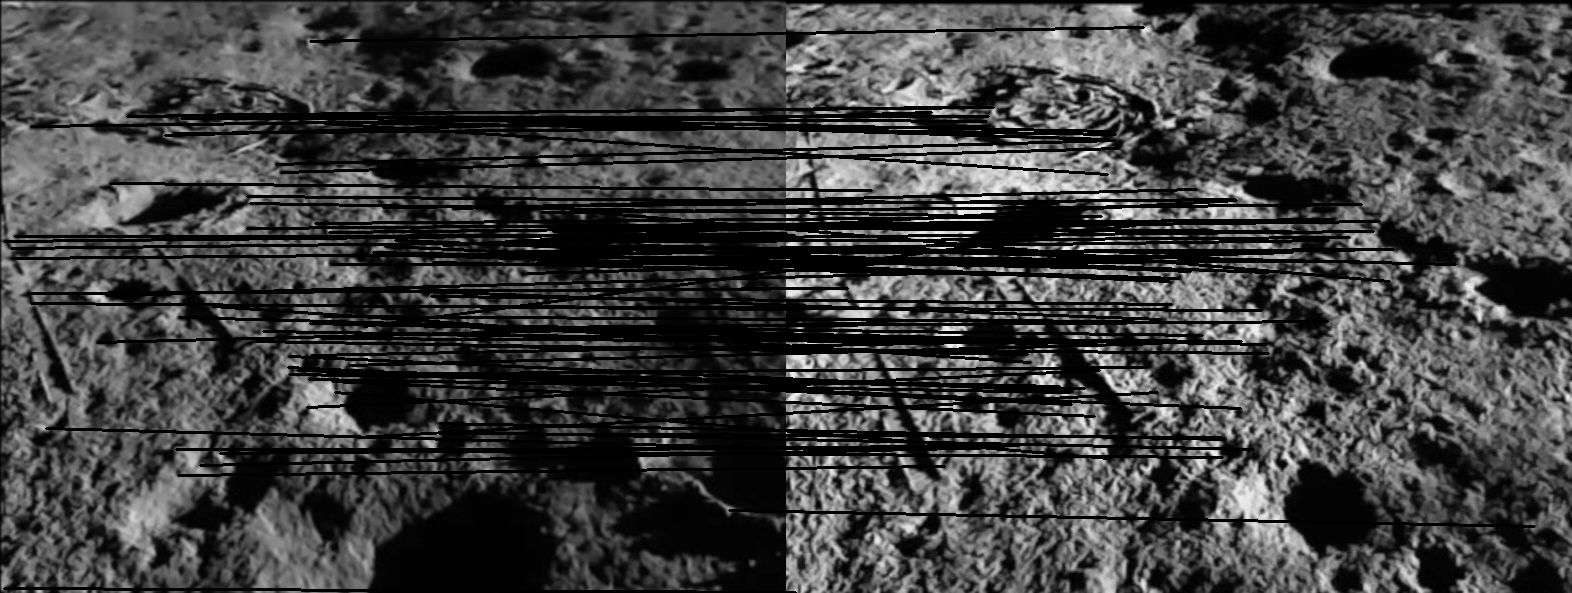

In [ ]:
import cv2
import numpy as np

# Load the two images in color format
image1_color = cv2.imread('/content/drive/MyDrive/Chandrayaan3/After.jpg', cv2.IMREAD_COLOR)
image2_color = cv2.imread('/content/drive/MyDrive/Chandrayaan3/Before.jpg', cv2.IMREAD_COLOR)

# Convert the images to grayscale
image1 = cv2.cvtColor(image1_color, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2_color, cv2.COLOR_BGR2GRAY)

image1 = image1[0:593, 0:786]
image2 = image2[0:593, 0:786]

# Ensure both grayscale images have the same dimensions
assert image1.shape == image2.shape, "Input images must have the same dimensions."

# Perform feature detection and matching (using goodFeaturesToTrack and calcOpticalFlowPyrLK)
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Find features in the first image
p0 = cv2.goodFeaturesToTrack(image1, mask=None, **feature_params)

# Calculate optical flow from image1 to image2
if p0 is not None:  # Check if features were found
    p1, st, err = cv2.calcOpticalFlowPyrLK(image1, image2, p0, None, **lk_params)

    # Filter out the valid points
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Create an image to display both images side by side
    h, w = image1.shape
    result_image = np.zeros((h, 2 * w), dtype=np.uint8)
    result_image[:, :w] = image1
    result_image[:, w:] = image2

    arrow_color = (0, 255, 0)

    # Draw lines or arrows indicating feature matching
    for (new, old) in zip(good_new, good_old):
        a, b = new.ravel().astype(int)
        c, d = old.ravel().astype(int)
        cv2.line(result_image, (c, d), (a + w, b), arrow_color, 2)  # Red lines/arrows

    # Display the side-by-side images with feature matching lines/arrows
    cv2_imshow(result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    print("No features found in the first image.")


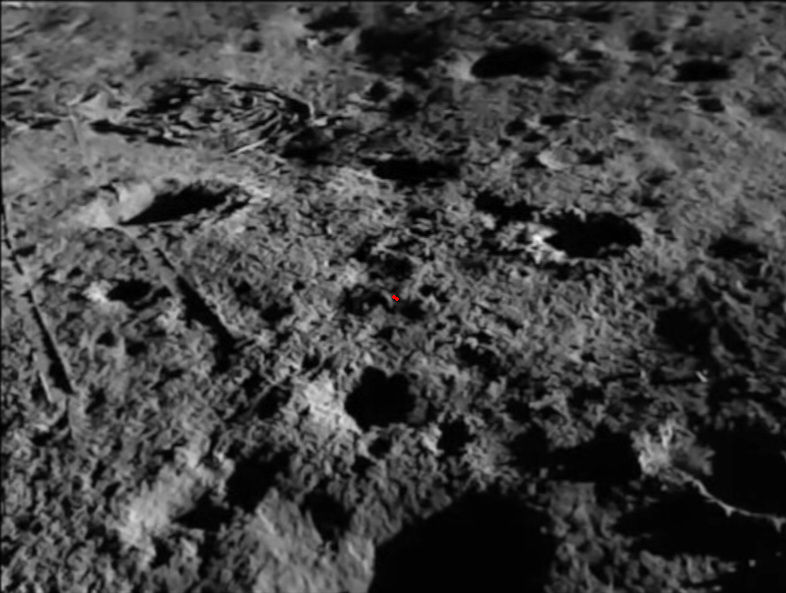

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Google Colab

# Load the two images
image1 = cv2.imread('/content/drive/MyDrive/Chandrayaan3/After.jpg', cv2.IMREAD_COLOR)
image2 = cv2.imread('/content/drive/MyDrive/Chandrayaan3/Before.jpg', cv2.IMREAD_COLOR)

image1 = image1[0:593, 0:786]
image2 = image2[0:593, 0:786]

# Ensure both images have the same dimensions
assert image1.shape == image2.shape, "Input images must have the same dimensions."

# Perform feature detection and matching (using goodFeaturesToTrack and calcOpticalFlowPyrLK)
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Find features in the first image
p0 = cv2.goodFeaturesToTrack(cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY), mask=None, **feature_params)

# Calculate optical flow from image1 to image2
if p0 is not None:  # Check if features were found
    p1, st, err = cv2.calcOpticalFlowPyrLK(cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY),
                                           cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY),
                                           p0, None, **lk_params)

    # Filter out the valid points
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Calculate the overall translation (mean of motion vectors)
    mean_motion_vector = np.mean(good_new - good_old, axis=0)

    # Calculate the image center
    center_x = image1.shape[1] // 2
    center_y = image1.shape[0] // 2

    # Calculate the end point of the arrow
    arrow_end_x = int(center_x + mean_motion_vector[0])
    arrow_end_y = int(center_y + mean_motion_vector[1])

    # Draw a single arrow indicating the movement on image1
    arrow_color = (0, 0, 255)  # Red arrow
    thickness = 2
    cv2.arrowedLine(image1, (center_x, center_y), (arrow_end_x, arrow_end_y), arrow_color, thickness)

    # Display the image with the arrow representing the movement using cv2_imshow
    cv2_imshow(image1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    print("No features found in the first image.")


In [ ]:
# Convert pixel motion to centimeters
motion_in_pixels = np.array([mean_motion_vector[0], mean_motion_vector[1]])  # Pixel motion vector
scale_factor = 0.000488
motion_in_cm = motion_in_pixels * scale_factor  # Convert to centimeters

print("Camera movement in centimeters:", motion_in_cm)

Camera movement in centimeters: [-0.00100969 -0.00039254]


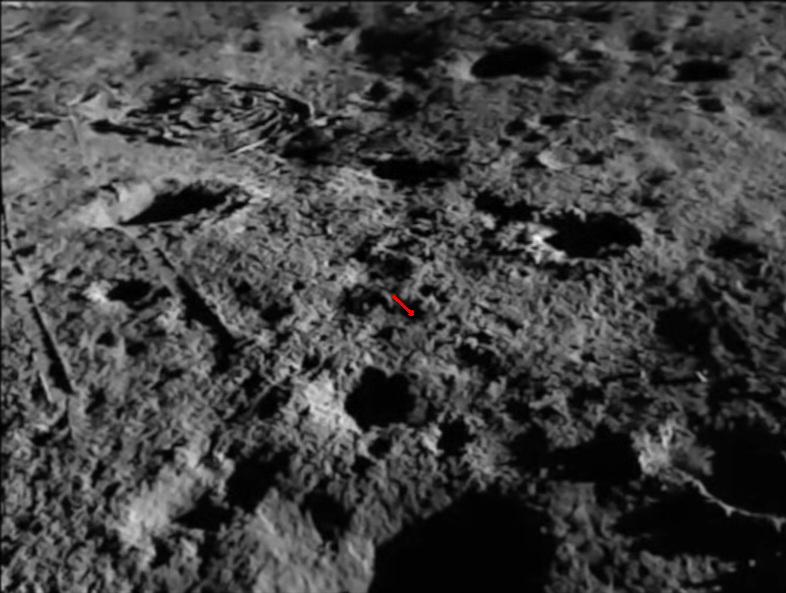

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Google Colab

# Load the two images
image1 = cv2.imread('/content/drive/MyDrive/Chandrayaan3/After.jpg', cv2.IMREAD_COLOR)
image2 = cv2.imread('/content/drive/MyDrive/Chandrayaan3/Before.jpg', cv2.IMREAD_COLOR)

image1 = image1[0:593, 0:786]
image2 = image2[0:593, 0:786]

# Ensure both images have the same dimensions
assert image1.shape == image2.shape, "Input images must have the same dimensions."

# Perform feature detection and matching (using goodFeaturesToTrack and calcOpticalFlowPyrLK)
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Find features in the first image
p0 = cv2.goodFeaturesToTrack(cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY), mask=None, **feature_params)

# Calculate optical flow from image1 to image2
if p0 is not None:  # Check if features were found
    p1, st, err = cv2.calcOpticalFlowPyrLK(cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY),
                                           cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY),
                                           p0, None, **lk_params)

    # Filter out the valid points
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Calculate the mean motion vector (in pixels)
    mean_motion_vector = np.mean(good_new - good_old, axis=0)

    # Convert pixel motion to real-world units (e.g., centimeters) using the scale factor
    scale_factor = 4.88  # Replace with your calculated scale factor
    motion_in_cm = mean_motion_vector * scale_factor

    # Calculate the arrow endpoint
    arrow_start = (image1.shape[1] // 2, image1.shape[0] // 2)  # Start from the image center
    arrow_end = (int(arrow_start[0] + motion_in_cm[0]), int(arrow_start[1] + motion_in_cm[1]))

    # Draw an arrow representing the camera movement on image1
    arrow_color = (0, 0, 255)  # Red arrow
    thickness = 2
    cv2.arrowedLine(image1, arrow_start, arrow_end, arrow_color, thickness)

    # Display the image with the arrow representing the movement
    cv2_imshow(image1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    print("No features found in the first image.")


In [ ]:
print(motion_in_cm)

[19.68308  18.342226]


Resultant Distance (cm): 33.079506
Resultant Angle (degrees): 42.98046558856265


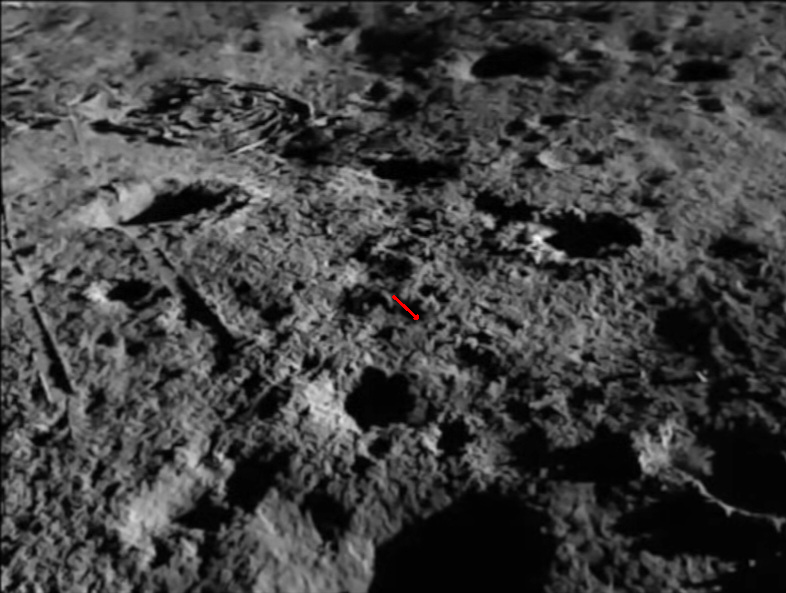

In [ ]:
import cv2
import numpy as np
import math  # Import math module for angle calculation
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Google Colab

# Load the two images
image1 = cv2.imread('/content/drive/MyDrive/Chandrayaan3/After.jpg', cv2.IMREAD_COLOR)
image2 = cv2.imread('/content/drive/MyDrive/Chandrayaan3/Before.jpg', cv2.IMREAD_COLOR)

image1 = image1[0:593, 0:786]
image2 = image2[0:593, 0:786]

# Ensure both images have the same dimensions
assert image1.shape == image2.shape, "Input images must have the same dimensions."

# Perform feature detection and matching (using goodFeaturesToTrack and calcOpticalFlowPyrLK)
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Find features in the first image
p0 = cv2.goodFeaturesToTrack(cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY), mask=None, **feature_params)

# Calculate optical flow from image1 to image2
if p0 is not None:  # Check if features were found
    p1, st, err = cv2.calcOpticalFlowPyrLK(cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY),
                                           cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY),
                                           p0, None, **lk_params)

    # Filter out the valid points
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Calculate the mean motion vector (in pixels)
    mean_motion_vector = np.mean(good_new - good_old, axis=0)

    # Convert pixel motion to real-world units (e.g., centimeters) using the scale factor
    scale_factor = 6#4.88  # Replace with your calculated scale factor
    motion_in_cm = mean_motion_vector * scale_factor

    # Calculate the resultant distance
    resultant_distance = np.linalg.norm(motion_in_cm)

    # Calculate the resultant angle (in radians) using arctan2
    resultant_angle_rad = math.atan2(motion_in_cm[1], motion_in_cm[0])

    # Convert the resultant angle to degrees
    resultant_angle_deg = math.degrees(resultant_angle_rad)

    # Display the calculated values
    print("Resultant Distance (cm):", resultant_distance)
    print("Resultant Angle (degrees):", resultant_angle_deg)

    # Draw an arrow representing the camera movement on image1
    arrow_start = (image1.shape[1] // 2, image1.shape[0] // 2)  # Start from the image center
    arrow_end = (int(arrow_start[0] + motion_in_cm[0]), int(arrow_start[1] + motion_in_cm[1]))

    arrow_color = (0, 0, 255)  # Red arrow
    thickness = 2
    cv2.arrowedLine(image1, arrow_start, arrow_end, arrow_color, thickness)

    # Display the image with the arrow representing the movement
    cv2_imshow(image1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    print("No features found in the first image.")


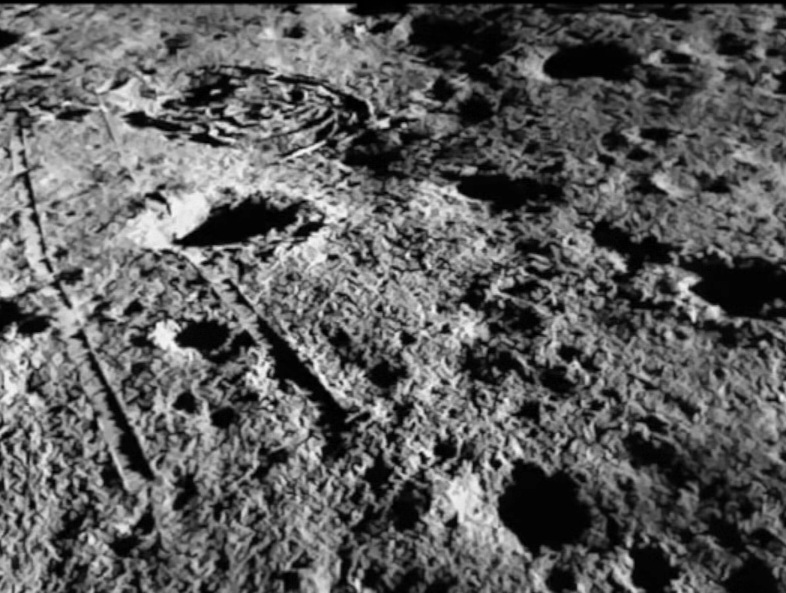

In [ ]:
cv2_imshow(image2)

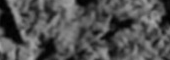

In [ ]:
cv2_imshow(image1[350:410,50:220])